# Credit:
### [How to Use Word Embedding Layers for Deep Learning with Keras](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/)
### [Word embedding using keras embedding layer | Deep Learning Tutorial 40 (Tensorflow, Keras & Python)](https://www.youtube.com/watch?v=Fuw0wv3X-0o&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=41)

# [What Is Keras?](https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-is-keras)
Keras is a high-level, open-sourced end-to-end platform supporting, deep learning API developed by **Google** for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy. It also supports multiple backend neural network computation.                         

**Keras** is relatively easy to learn and work with because it provides a python frontend with a high level of abstraction while having the option of multiple back-ends for computation purposes. This makes <u>*Keras slower than other deep learning frameworks, but extremely beginner-friendly.*</u>


Keras allows you to switch between different back ends frameworks. The frameworks supported by Keras are:<br>
* Tensorflow
* Theano
* PlaidML
* MXNet
* CNTK (Microsoft Cognitive Toolkit )

Out of these five frameworks, **TensorFlow** has adopted Keras as its official high-level API. Keras is embedded in TensorFlow and can be used to perform deep learning fast as it provides inbuilt modules for all neural network computations. At the same time, computation involving tensors, computation graphs, sessions, etc can be custom made using the Tensorflow Core API, which gives you total flexibility and control over your application and lets you implement your ideas in a relatively short time.

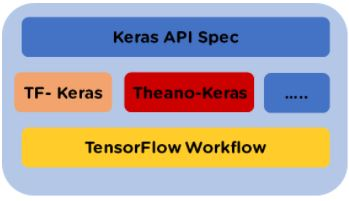

#### Keras Backend

In [1]:
# !pip3 install keras
!pip3 install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [2]:
import numpy as np

import tensorflow
import keras

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

print(keras.__version__)

3.3.3


#### Supervised Learning Word Embedding
For food review classification

In [3]:
reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

#### Here, one hot encoding is used to give unique number to the word text from the given input range of vocabulary of 30 or 50 long

In [4]:
# one hot encoding for two words here
vocab_size = 30
one_hot('amazing restaurant', vocab_size)

[26, 12]

In [5]:

encode_review = []
for encode_text in reviews:
  encode_review.append(one_hot(encode_text, vocab_size))
print(encode_review)


[[5, 1], [26, 12], [25, 15], [3, 13, 5], [11, 1, 17], [20, 1], [8, 1, 7], [13, 24], [13, 16], [19, 20]]


In [6]:
# list comprehension of above source code
encode_review = [one_hot(encode_text, vocab_size) for encode_text in reviews]
print(encode_review)

[[5, 1], [26, 12], [25, 15], [3, 13, 5], [11, 1, 17], [20, 1], [8, 1, 7], [13, 24], [13, 16], [19, 20]]


#### Each input word has to be vectorized with common and equal dimension for each and every word

In [7]:
max_ip_len = 4

# pad_sequences
It is a built-in function in libraries like **TensorFlow and Keras**, making it easy to use and integrate into your data preprocessing pipeline.

Keras <u>**pad_sequences**</u> function is used to pad the sequences with the same length. The keras pad sequence function transforms several sequences into the numpy array.

```
tf.keras.utils.pad_sequences(
    sequences,
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
)
```

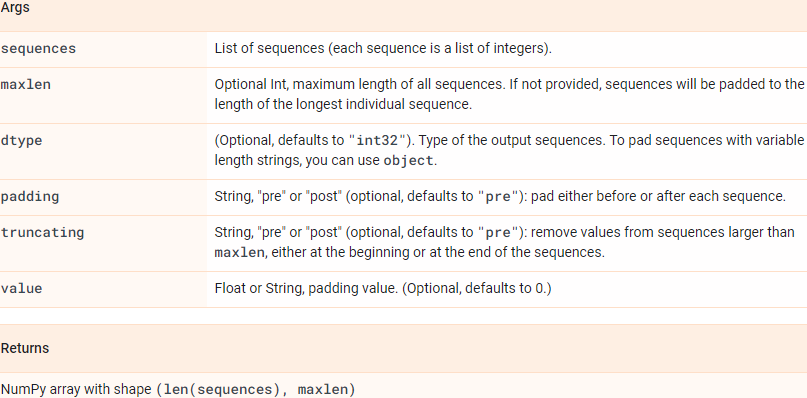

In [8]:
padding_review = pad_sequences(sequences=encode_review, maxlen=max_ip_len, padding='post')
# padding_review = pad_sequences(sequences=encode_review, maxlen=max_ip_len, padding='pre')
padding_review

array([[ 5,  1,  0,  0],
       [26, 12,  0,  0],
       [25, 15,  0,  0],
       [ 3, 13,  5,  0],
       [11,  1, 17,  0],
       [20,  1,  0,  0],
       [ 8,  1,  7,  0],
       [13, 24,  0,  0],
       [13, 16,  0,  0],
       [19, 20,  0,  0]], dtype=int32)

In [9]:
embed_vector_size = 5

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, embed_vector_size))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))